[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)

# **Import Libraries**

## **Explanation:**
##Used to Import furture libraries for future use.

In [23]:
import geopandas as gp # Geographic data analysis library used for working with spatial data.
import pandas as pd # Library that allows for the processing and analysis of tabular data.
import numpy as np # for numerical operations
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting
import re # regular expression manipulation

from shapely.geometry import Point # Point class allows for the creation geometric points from coordinate data.
from google.colab import drive # Allows for the access of data from the Google drive for use in Google Colab.
from pandas.plotting import scatter_matrix # Scatter Matrix for Selected Features

##**Interpretation:**
## Throught the file these libraries will help us interpret, convert, and visualize our information.


---



#**Data Use Location**

## **Explanation:**
## The datasets that we have regarding fires and state sizes are in our Google drive. With this code we can grab that information and use it in this coding space.

In [24]:
# Specifies that we can use data in our Google Drive under '/content/drive'.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Interpretation:**
## Now that we can access our datasets from the share Google we can use it for our data interpretation code.


---



#**National Fire Datasets Manipulation**

##**Explanation:**
##We are extracting the datasets for reported national fires from the USFS national fires occurences dataset and creating exact geographical points for the datasets.

In [25]:
# low_memory=False: At the cost of memory, large sums of data can be extracted all at once resulting in better accuracy.
df = pd.read_csv('/content/drive/MyDrive/CS4330/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv', low_memory=False)   # Dataset for National fires occurences

# zip(df['X'], df['Y']): Combines the lists of X and Y together returning a iterater of tuples.
# With this iterator we can place it's tuples into the long_lad point object to designate fire locations.
# Point(long_lad): Creates a gemetric point in space using the coordinate values of X and Y in space so
# that we can use the coordinates to pin point specific fire location.
fires = [Point(long_lad) for long_lad in zip(df['X'], df['Y'])]

# GeoDataFrame: Creates a table of combining data using the df dataset to create a spatial-enabled dataframe.
# crs="EPSG:4326": Classifies the coordinate system to be used when pin pointing specific coordinates.
# EPSG:4326 is the WGS84 or World Geodetic System 1984 that allows for mapping latitudes and logitudes.
# geometry=fires: Takes the geometric points in fires to define a points location.
loc_df = gp.GeoDataFrame(df, geometry=fires, crs="EPSG:4326")
loc_df

,X,Y,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,FIREYEAR,...,LONGDD83,FIRETYPECATEGORY,POINTTYPE,PERIMEXISTS,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE,geometry
0,-106.427778,39.846111,231055009,{540C6E70-51FD-4CCC-A1B3-8A6C914E34A3},2B1B9A1B-7828-4688-A14C-4BD7CEE62226,NaN,2023/03/29 11:10:56+00,Elliott Ridge,NaN,2016.0,...,-106.42778,WF,General,N,Yes,215,2024/09/24 04:01:09+00,24000.0,NaN,POINT (-106.42778 39.84611)
1,-107.935556,39.372778,231055010,{ACE77CF8-1281-4A81-BE3D-4D55669CB134},A2454D64-EBB7-4895-81BC-9782B3D1391E,NaN,2023/03/29 11:10:59+00,Battlement Mesa Reservoir,NaN,2016.0,...,-107.93556,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.93556 39.37278)
2,-106.723333,39.118333,231055011,{D8EA7329-A0D0-4B64-A6F2-7A7FD86A3505},NaN,NaN,2023/03/29 11:10:56+00,Difficult,NaN,1997.0,...,-106.72333,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.72333 39.11833)
3,-106.590000,39.656667,231055012,{67A72390-0E2B-411E-9CDE-6657101645E4},NaN,NaN,2023/03/29 11:10:56+00,,NaN,1993.0,...,-106.59000,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.59 39.65667)
4,-107.317311,40.019286,231055013,{DFFF8D93-DE89-451C-830C-1F65FD550B3D},558D5D61-AB04-4AC3-8143-2E0EBE7CB506,NaN,2024/03/27 14:21:08+00,Paradise,NaN,2020.0,...,-107.31731,WF,General,Y,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.31731 40.01929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582029,-123.351389,40.951389,231639252,{5F229FD0-02EB-45BF-9FF8-203DA2166E2F},NaN,NaN,2019/01/02 00:00:00+00,MILLER,NaN,2005.0,...,-123.35139,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-123.35139 40.95139)
582030,-118.751667,34.648056,231639253,{483F5A91-BF46-4F42-B201-D3F310BD5974},NaN,NaN,2019/01/02 00:00:00+00,TRACTOR,NaN,2010.0,...,-118.75167,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-118.75167 34.64806)
582031,-117.477222,34.313333,231639254,{D07AAFF1-AA11-49A6-AEC3-E6F7E4200869},NaN,NaN,2019/01/02 00:00:00+00,MIDDLE2,NaN,2009.0,...,-117.47722,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-117.47722 34.31333)
582032,-121.106944,38.978056,231639255,{A56C6E42-6C6A-474A-8904-04321166EC30},NaN,NaN,2019/01/02 00:00:00+00,CRAMER,NaN,1996.0,...,-121.10694,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-121.10694 38.97806)


## **Interpretation:**
## As a result, we have added a geographic pinpoint to dataset which allows us to have a proper world location for reported fires on our axes.


---



#**US Boundry Datasets Manipulation**

##**Explanation:**
## We are looking to extact and convert the shapes of the states and counties from the 2024 US census in order to pinpoint the fires reported in the US.

In [26]:
# US census data of county and state geometric boundary data.
county_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_county/tl_2024_us_county.shp')
state_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_state/tl_2024_us_state.shp')

# Coverts the coordinates system, consistent with our coordinate systems already used in our code, to identify the mapping of states and counties.
county_shapes = county_shapes.to_crs("EPSG:4326")
state_shapes = state_shapes.to_crs("EPSG:4326")

print(county_shapes)
print('\n')
print(state_shapes)

     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None        A   
1     Wahkiakum C

##**Interpretation:**
## As a result, we have pinpointed the geograpical shapes of the US states and counties.
---



#**Creation of Counties Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the counties in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [27]:
# gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects"): Combines the geodataframes of county boundary data and fire locations within the US.
# how="left": Keeps all data records even if they do not match.
# predicate="intersects": Outlines that fire data with be assigned to county boundary data if the fire is with in or touching county lines
counties = gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects")
# counties.rename(columns = {'NAME':'COUNTY'}, inplace = True): Renames to specify that the column specified as 'NAME' is called 'COUNTY'.
# inplace = True: Updates the columns name instead of making a modified copy.
counties.rename(columns = {'NAME':'COUNTY'}, inplace = True)
# Specifies the only columns that should be listed in counties.
counties = counties[['Y', 'X', 'COUNTY', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
counties

,Y,X,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Eagle,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Garfield,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Pitkin,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Eagle,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Rio Blanco,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,Trinity,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,Los Angeles,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,San Bernardino,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,Placer,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and county, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---



#**Creation of States Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the states in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [28]:
# gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects"): Combines the geodataframes of state boundary data and fire locations within the US.
states = gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects")
states.rename(columns = {'NAME':'STATE'}, inplace = True)
states = states[['Y', 'X', 'STATE', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
states

,Y,X,STATE,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Colorado,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Colorado,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Colorado,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Colorado,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Colorado,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,California,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,California,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,California,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,California,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and states, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---

#**Merging of Counties and States Datasets**

##**Explanation:**
## Now that we have our unique datasets for US states and counties, we now want to merge them for a final dataset we can use throught the project.

In [29]:
# Merges the counties and states datasets.
# on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']: Specifies the matching data of these two sets to combined on.
# how='inner': Specifies to include only simalar data in the new data set.
us_fires = pd.merge(counties, states, on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY'], how='inner')
us_fires = us_fires.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
us_fires
print(us_fires.columns)

Index(['LATITUDE', 'LONGITUDE', 'COUNTY', 'FIREYEAR', 'SIZECLASS',
       'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY', 'STATE'],
      dtype='object')


##**Interpretation:**
##We have now merge the two datasets to get a dataset with both US counties and states regarding fire reports and all the details regarding those reports. We have also managed to clarify that the x and y are the longitudes and latitudes.


---



#**ERRORS and Formating Problems**

##**Explanation:**
##We are now looking to identify all of the errors regarding formating issues, repeating values, data outliers that cannot be intrepreted or corrected, and data with no values. Depending on the circumstance we want to either correct or eliminate this data before we start creating any visual graphs. If not that information will influence the resulting output significantly enough to change our final results.

In [30]:
# Wrong values outide of recorded US history with no way of correcting them to identify FIREYEAR value = Eliminate
fireyear_print = us_fires['FIREYEAR'].fillna(-1)
fireyear_print = fireyear_print[(fireyear_print < 1900) | (fireyear_print > 2024)].replace(-1, np.nan)
fireyear_print = list(fireyear_print.unique())
print('FIREYEAR row elimination:', fireyear_print)
print('\n')

# Incorrect number of decimal places for FIREYEAR = correction changes needed
print('FIREYEAR decimal place correction needed:')
print(us_fires['FIREYEAR'].head())
print('\n')

# FIRETYPECATEGORY text and missing, unidentifable or incorrect abreviation values = correction changes needed
abbreviation_symbols = ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
print('Needed convertions for FIRETYPECATEGORY abbreviated strings:', list(us_fires[us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('Incorrect FIRETYPECATEGORY values:', list(us_fires[~us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('\n')

# STATCAUSE category labeling issue with missing or unidentifiable value representations, incorrect spelling,
# and unnescessary character use = correction changes needed
cause_category = ['Camping', 'Lightning', 'Undetermined', 'Smoking', 'Debris/Open Burning', 'Other Human Cause',
                  'Incendiary', 'Equipment', 'Railroad', 'Other Natural Cause', 'Utilities', 'Firearms/Weapons',
                  'Natural', 'Human', 'Miscellaneous', 'Debris Burning', 'Equipment Use', 'Children', 'Campfire', 'Debris burning',
                  'Arson', 'Powgen/trans/distrib', 'Equip/vehicle use', 'Other causes', 'Investigated But Und', 'Cause not Identified']
print('Incorrect values, spelling and strings for STATCAUSE:', list(us_fires[~us_fires['STATCAUSE'].isin(cause_category)]['STATCAUSE'].unique()))
print('\n')

# Missing COUNTY value = correction changes needed
print('Number of nan COUNTY value:', us_fires['COUNTY'].isna().sum())
print('\n')

# Missing STATE value = correction changes needed
print('Number of nan STATE value:', us_fires['STATE'].isna().sum())
print('\n')

# Combination of missing COUNTY & STATE values = Eliminate
print('Number rows with nan COUNTY & STATE values that need to be eliminated:', us_fires[(us_fires['COUNTY'].isna()) & (us_fires['STATE'].isna())].shape[0])
print('\n')

# TOTALACRES category missing value representations = correction changes needed
print('Num of nan TOTALACRES Values:', us_fires['TOTALACRES'].isna().sum())
print('\n')

# Missing LONGITUDE or LATITUDE Values = Eliminate
print('Num of rows with missing LONGITUDE Values to be eliminated:', us_fires['LONGITUDE'].isna().sum())
print('\n')
print('Num of rows with missing LATITUDE Values to be eliminated:', us_fires['LATITUDE'].isna().sum())
print('\n')

# SIZECLASS category has missing or unidentifiable value representations and incorrect symbol
# = correction changes needed
# A list of the letters for the fire class sizes
fire_class_symbol = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
print('Incorrect, missing, or unidentifiable values in SIZECLASS:', list(us_fires[~us_fires['SIZECLASS'].isin(fire_class_symbol)]['SIZECLASS'].unique()))
print('\n')

# Duplicates of Rows = Eliminate
exact_duplicates = us_fires.duplicated(keep=False)
exact_duplicate_rows = us_fires[exact_duplicates]
print('Number of exact duplicate rows to eleminate:', exact_duplicate_rows.shape[0])
print('\n')
print('Total rows:', len(us_fires))

FIREYEAR row elimination: [9999.0, nan, 1001.0, 0.0, 8.0]


FIREYEAR decimal place correction needed:
0    2016.0
1    2016.0
2    1997.0
3    1993.0
4    2020.0
Name: FIREYEAR, dtype: float64


Needed convertions for FIRETYPECATEGORY abbreviated strings: ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
Incorrect FIRETYPECATEGORY values: [nan, ' ']


Incorrect values, spelling and strings for STATCAUSE: [nan, '3', '1', '2', '5', '4', '9', '6', '7', '8', 'Undertermined', 'Firearms/Weapons ', '0', '9 -  Miscellaneous', '5 -  Debris Burning', 'Camping ', '1 - Lightning', '9 - Miscellaneous', '4 - Campfire', '5 - Debris burning', '7-Arson', '5-Debris burning', ' Undetermined']


Number of nan COUNTY value: 123


Number of nan STATE value: 123


Number rows with nan COUNTY & STATE values that need to be eliminated: 123


Num of nan TOTALACRES Values: 3740


Num of rows with missing LONGITUDE Values to be eliminated: 43


Num of rows with missing LATITUDE Values to be eliminated:

##**Interpretation:**
## We have now identified the all formating, duplicates, data outliers, missing data, and uninterpretable data for correction or elimination.


---



#**Dataset Error and Formating Changes**

##**Explanation:**
##Now that we have identified our data issues we want to start correcting or eliminating them so that our visuals in our graphs are easier to interpret.

In [31]:
# creates a list that holds unique numeric values catagories
numeric = ["FIREYEAR", "TOTALACRES"]

# creates a list that holds unique catigory values catagories
categoric = ["COUNTY", "SIZECLASS", "STATCAUSE", "FIRETYPECATEGORY", "STATE"]

# Fills missing numeric data with -1
us_fires[numeric] = us_fires[numeric].fillna(-1)

# Fills missing categoric data with 'Unknown'
us_fires[categoric] = us_fires[categoric].fillna('Unknown')

# us_fires['FIREYEAR'] = us_fires['FIREYEAR'].fillna(0).astype(int): Specifies the column's assigned type as all integers
# and fills any missing years data with a -1.
us_fires['FIREYEAR'] = us_fires['FIREYEAR'].astype(int)
# tracks from the lowest year of 1900 to 2024 due to outside values being 9999, -1, 1001, 0, and 8
us_fires = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)].copy()
# replaces string abbreviation
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace(' ', 'Unknown', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FW', 'FIRE WEATHER', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FA', 'FIRE ACTIVITY', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RX', 'PRESCRIBED FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PC', 'PRESCRIBED FIRE - CONTROLLED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('SU', 'SUSPENDED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WW', 'WILDLAND FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RP', 'RESEARCH PROJECT', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PP', 'PROJECT PLAN', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('CX', 'CONTRACT EXTINGUISHER', case=False)
# replaces strings
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Undertermined', 'Undetermined', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace(r'^[\d\s-]*', ' ', regex=True)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.strip(' ')
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].replace('', 'Unknown')
# removes rows with counties and states that are unknown
us_fires = us_fires[~((us_fires['COUNTY'] == 'Unknown') & (us_fires['STATE'] == 'Unknown'))]
# removes rows of logitude with nan
us_fires = us_fires.dropna(subset=['LONGITUDE'])
# removes rows of latitude with nan
us_fires = us_fires.dropna(subset=['LATITUDE'])
# remove duplicates
us_fires = us_fires.drop_duplicates()

# A list for fire class sizes based on destroyed acres going from A to L
fire_sizes = [(us_fires['TOTALACRES'] >= 0.00) & (us_fires['TOTALACRES'] <= 0.25),          # A
              (us_fires['TOTALACRES'] >= 0.26) & (us_fires['TOTALACRES'] <= 9.99),          # B
              (us_fires['TOTALACRES'] >= 10.00) & (us_fires['TOTALACRES'] <= 99.99),        # C
              (us_fires['TOTALACRES'] >= 100.00) & (us_fires['TOTALACRES'] <= 299.99),      # D
              (us_fires['TOTALACRES'] >= 300.00) & (us_fires['TOTALACRES'] <= 999.99),      # E
              (us_fires['TOTALACRES'] >= 1000.00) & (us_fires['TOTALACRES'] <= 4999.99),    # F
              (us_fires['TOTALACRES'] >= 5000.00) & (us_fires['TOTALACRES'] <= 9999.99),    # G
              (us_fires['TOTALACRES'] >= 10000.00) & (us_fires['TOTALACRES'] <= 49999.99),  # H
              (us_fires['TOTALACRES'] >= 50000.00) & (us_fires['TOTALACRES'] <= 99999.99),  # I
              (us_fires['TOTALACRES'] >= 100000.00) & (us_fires['TOTALACRES'] <= 499999.99),# J
              (us_fires['TOTALACRES'] >= 500000.00) & (us_fires['TOTALACRES'] <= 999999.99),# K
              (us_fires['TOTALACRES'] >= 1000000.00)]                                       # L

# List holding A to L
fire_size_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Assigns a letter based on destroyed acres to 'SIZECLASS' and fills undetermarable data with 'Unknown'
us_fires.loc[:, 'SIZECLASS'] = np.select(fire_sizes, fire_size_class, default='Unknown')

us_fires

,LATITUDE,LONGITUDE,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY,STATE
0,39.846111,-106.427778,Eagle,2016,A,0.25,Camping,WILDFIRE,Colorado
1,39.372778,-107.935556,Garfield,2016,A,0.10,Camping,WILDFIRE,Colorado
2,39.118333,-106.723333,Pitkin,1997,A,0.10,Lightning,WILDFIRE,Colorado
3,39.656667,-106.590000,Eagle,1993,A,0.10,Undetermined,WILDFIRE,Colorado
4,40.019286,-107.317311,Rio Blanco,2020,A,0.10,Camping,WILDFIRE,Colorado
...,...,...,...,...,...,...,...,...,...
672023,40.951389,-123.351389,Trinity,2005,B,0.50,Undetermined,WILDFIRE,California
672024,34.648056,-118.751667,Los Angeles,2010,A,0.10,Equipment,WILDFIRE,California
672025,34.313333,-117.477222,San Bernardino,2009,A,0.10,Equipment,WILDFIRE,California
672026,38.978056,-121.106944,Placer,1996,C,10.00,Equipment,WILDFIRE,California


##**Interpretation:**
## The resulting data filled any missing data with identifiable values (i.e '-1' add 'Unknown'). Next, 'FIREYEAR' has now been correct to an int column removing the decimal place and removed the outlier data that cannot be interpreted for correction as well as does not fit at all into the dataset (i.e Years: 9999, -1 (previously nan), 1001, 0, 8). All abbreviations have been given their repective full names. Incorrect string values have been corrected. We have removed all missing latitude, logitude, rows with both missing states and county values, as well as duplicate rows. Finally, we have corrected all the repective letter values in the 'SIZECLASS' feature using it reflective data base on the sizes listed out in the 'TOTALACRES' feature.


---



#**Section 1 - Linear Regression Plot**

##**Explanation:**
##In the follow code we are using a linear regression plot in order to identify the observed vs predicted average latitudes over the decades (1900-2020). As a result we will want to find where fires are mos frequent over the decades to determine geography of fire patterns.

Single Train-Test Split:
Performance: 71.28%
Mean Absolute Error: 1.12398
Mean Squared Error: 2.03652
Root Mean Squared Error: 1.42707

K-Fold Cross-Validation Performance:
Average Performance: -1723.96%
Average Mean Absolute Error: 1.34778
Average Mean Squared Error: 2.98357
Average Root Mean Squared Error: 1.47503


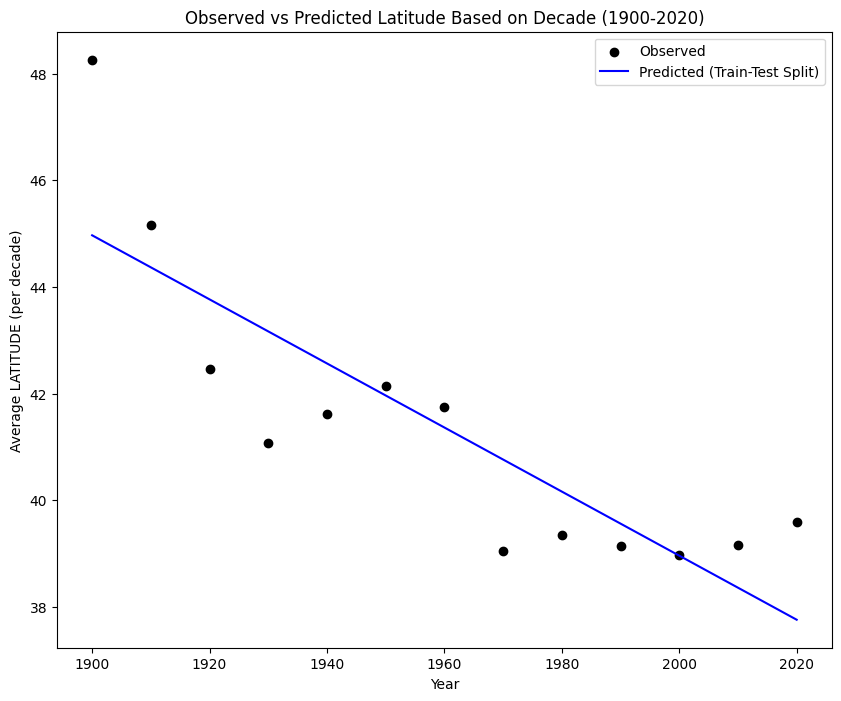

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

filtered_us_fires = us_fires[(us_fires['FIREYEAR'] <= 2020) & (us_fires['FIREYEAR'] >= 1900) & (us_fires['TOTALACRES'] >= 0)].copy()
filtered_us_fires.loc[:, 'FIREDECADE'] = (filtered_us_fires['FIREYEAR'] // 10) * 10
avg_latitude_per_decade = filtered_us_fires.groupby('FIREDECADE')[['LATITUDE']].mean().reset_index()

X = avg_latitude_per_decade[['FIREDECADE']].values
y = avg_latitude_per_decade[['LATITUDE']].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_predict = linear_model.predict(X)

r_squared = r2_score(y, y_predict)
mean_absolute_error_val = mean_absolute_error(y, y_predict)
mean_squared_error_val = mean_squared_error(y, y_predict)
root_mean_squared_error_val = np.sqrt(mean_squared_error_val)

print(f"Single Train-Test Split:")
print(f"Performance: {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")
print(f"Mean Squared Error: {mean_squared_error_val:.5f}")
print(f"Root Mean Squared Error: {root_mean_squared_error_val:.5f}")

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_kf = linear_model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred_kf))
    mae_scores.append(mean_absolute_error(y_test, y_pred_kf))
    mse_scores.append(mean_squared_error(y_test, y_pred_kf))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_kf)))

print("\nK-Fold Cross-Validation Performance:")
print(f"Average Performance: {np.mean(r2_scores) * 100:.2f}%")
print(f"Average Mean Absolute Error: {np.mean(mae_scores):.5f}")
print(f"Average Mean Squared Error: {np.mean(mse_scores):.5f}")
print(f"Average Root Mean Squared Error: {np.mean(rmse_scores):.5f}")

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='black', label='Observed')
plt.plot(X, y_predict, color='blue', label='Predicted (Train-Test Split)')
plt.xlabel('Year')
plt.ylabel('Average LATITUDE (per decade)')
plt.title('Observed vs Predicted Latitude Based on Decade (1900-2020)')
plt.legend()
plt.show()

##**Interpretation:**
##Looking at our graph and data we can see that our results are negative and have a strong performance. We can also identify that on average for every decade the latitude seems to decrease in the average amount of reported fires per latitude over the decade and onwards having a negative and sharp decrease in average reported fire latitudes.

---



## Our understand of how our overall balance of our dataset has expanded. We have been able to identify the large margins that our overall dataset fall between. We have been able to learn about the relationship that the idea of average highest acres of distruction and decades play with one another. We have also been able to learn the relationship between acres of distruction, the class size of the fires, and the years of fires in the US have played with one another. Finally, we were able to identify margins of how large our relationship between our types of fires are and find there relationships with one another.

# **Section 2 - Multiple Linear Regression Model**

## Code Explanation

##The following code trains a **Random Forest Classifier** to predict the target variable, `SIZECLASS`, using features such as `FIREYEAR`, `TOTALACRES`, and `STATCAUSE`, based on data from U.S. fire incidents (`us_fires` dataset).

## Justification for Data Range and Format

##The same data range (1900 to 2024) as the original regression model was used for this analysis. This decision was made for two main reasons:

##1. **Limited Variety in Data**: While there is a reasonable amount of data, there is not enough variety in terms of feature diversity to effectively explore alternative ranges or transformations. Adjusting the data significantly would not add meaningful insights and may even reduce the interpretability of the model.

##2. **Graph Constraints**: Given the requirement to use a 3D visualization, we are limited in how we can display this data effectively. The current range and format provide a straightforward approach to display the relationships between `FIREYEAR`, `TOTALACRES`, and `SIZECLASS` in a 3D space. Making substantial changes would require significant creativity and might not yield better clarity or insights for this specific visualization.

##By maintaining consistency with the original model, we ensure the analysis remains interpretable and visually coherent with the chosen 3D graph format.

## Step-by-Step Breakdown

##1. **Data Preparation**:
  ## - **Copying Data**: A copy of the `us_fires` dataset is created to avoid modifying the original data.
  ## - **Filtering by Year**: The data is filtered to include records from 1900 to 2024, focusing on a specific time range.
  ## - **Encoding Categorical Variables**:
  ##   - If the `STATCAUSE` column exists, it is one-hot encoded to create binary columns for each category, with column names prefixed by `STATCAUSE_`.
  ## - If the `STATCAUSE` column is not found, this step is skipped.
  ## - **Label Encoding the Target**: The `SIZECLASS` column is converted to numerical labels using `LabelEncoder`, and the result is stored in a new column, `SIZECLASS_encoded`.
  ## - **Defining Features and Target**: The feature set includes `FIREYEAR`, `TOTALACRES`, and any `STATCAUSE`-related columns. The target variable is `SIZECLASS_encoded`.

##2. **Train-Test Split**:
  ## - The dataset is split into training (80%) and testing (20%) sets, allowing us to evaluate the model's performance on unseen data.
  ## - **Defining the Target and Features**: The `features` variable contains the list of columns used as inputs, while `SIZECLASS_encoded` serves as the target variable.

##3. **Feature Scaling**:
  ## - Only columns generated from one-hot encoding `STATCAUSE` are scaled using `StandardScaler`, ensuring each feature has a mean of zero and a standard deviation of one.
  ## - `FIREYEAR` and `TOTALACRES` are left unscaled to retain their original scales.

##4. **Model Training**:
  ## - A **Random Forest Classifier** is instantiated with 100 trees (`n_estimators=100`) and trained on the scaled training data. The Random Forest model is robust and well-suited for classification tasks, handling non-linear patterns effectively.

##5. **Making Predictions**:
  ## - The trained model is used to predict `SIZECLASS` on the test set. Predictions are generated based on the learned patterns from the training data.

##6. **Model Evaluation**:
  ## - Several metrics are calculated to assess the model's performance:
  ## - **Accuracy Score**: The percentage of correct predictions over total predictions.
  ## - **Mean Squared Error (MSE)**: The average squared difference between predicted and actual values, which penalizes larger errors more heavily.
  ## - **Root Mean Squared Error (RMSE)**: The square root of MSE, providing an error metric on the same scale as the target variable.
  ## - **Mean Absolute Error (MAE)**: The average absolute difference between predictions and actual values, indicating the average error magnitude.

##7. **Cross-Validation**:
  ## - **Cross-Validation** is used to assess model stability. The dataset is split into folds, and the model is trained and evaluated on each fold to calculate an average accuracy score. This process helps verify that the model generalizes well and is not overfitted to a single data split.

##8. **3D Visualization**:
   ## - A 3D scatter plot is generated to visually compare observed and predicted values of `SIZECLASS`:
   ##  - **Observed Points**: Represented in blue, showing the actual target values from the test set.
   ##  - **Predicted Points**: Represented in red, showing the model's predictions.
   ## - **Customization**: The plot includes labels for `FIREYEAR`, `TOTALACRES`, and `SIZECLASS (Encoded)`, with a grid and customized ticks for better readability.

##This structured approach ensures clear data processing, robust model training, and thorough evaluation to understand the model's performance and limitations.


Accuracy Score: 99.93%
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
Mean Absolute Error (MAE): 0.00
Cross-Validation Accuracy Scores: [0.9901452 0.9983268]
Mean Cross-Validation Accuracy: 99.42%


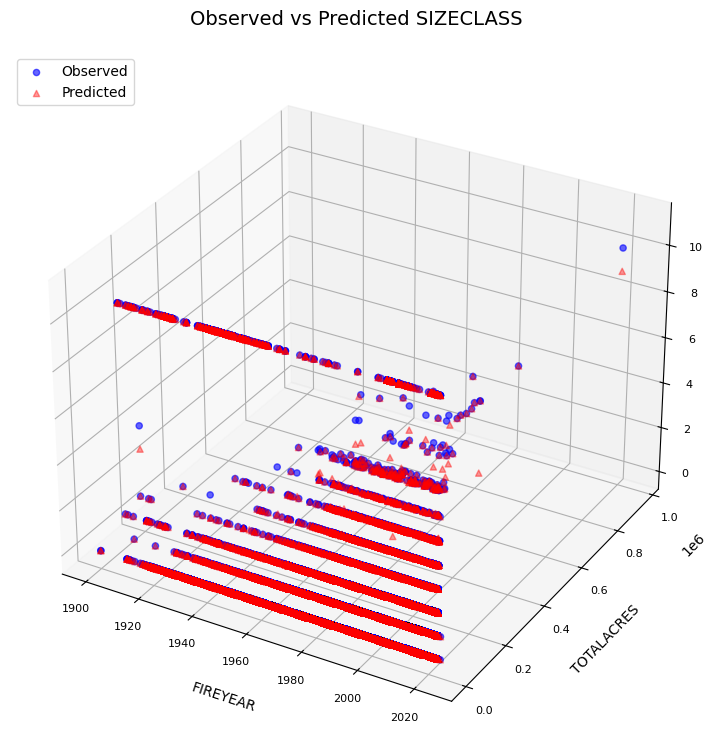

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Data Preparation and Preprocessing
# Assuming 'us_fires' is already defined in your notebook
us_fires_copy = us_fires.copy()

# Filter data for years between 1900 and 2024
us_fires_copy = us_fires_copy[(us_fires_copy['FIREYEAR'] >= 1900) & (us_fires_copy['FIREYEAR'] <= 2024)]

features = []

# Check if 'STATCAUSE' column exists before one-hot encoding
if 'STATCAUSE' in us_fires_copy.columns:
    # One-hot encode 'STATCAUSE' if not already done
    us_fires_copy = pd.get_dummies(us_fires_copy, columns=['STATCAUSE'], prefix='STATCAUSE')
    features = ['FIREYEAR', 'TOTALACRES'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
else:
    features = ['FIREYEAR', 'TOTALACRES']


# Encode 'SIZECLASS' as labels (not one-hot encoding)
le = LabelEncoder()
us_fires_copy['SIZECLASS_encoded'] = le.fit_transform(us_fires_copy['SIZECLASS'])

# Define features and target
if 'STATCAUSE' in us_fires_copy.columns:
    features = ['FIREYEAR', 'TOTALACRES'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
target = 'SIZECLASS_encoded'

# Step 2: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(us_fires_copy[features], us_fires_copy[target], test_size=0.2, random_state=42)

# Scale only STATCAUSE columns, leave FIREYEAR and TOTALACRES unscaled
feature_to_scale = [col for col in X_train.columns if col.startswith('STATCAUSE_')]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[feature_to_scale] = scaler.fit_transform(X_train[feature_to_scale])
X_test_scaled[feature_to_scale] = scaler.transform(X_test[feature_to_scale])

# Step 3: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Step 4: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy Score: {(accuracy * 100):.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Cross-validation
cv_scores = cross_val_score(clf, us_fires_copy[features], us_fires_copy[target], cv=2, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Step 5: 3D Plot Customization
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Observed points in blue with a lower alpha (transparency)
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_test, color='blue', label='Observed', s=20, alpha=0.6, marker='o')

# Predicted points in red with a different marker and higher transparency
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_pred, color='red', label='Predicted', s=20, alpha=0.4, marker='^')

# Customize plot labels, title, and legend
ax.set_xlabel('FIREYEAR', fontsize=10, labelpad=10)
ax.set_ylabel('TOTALACRES', fontsize=10, labelpad=10)
ax.set_zlabel('SIZECLASS (Encoded)', fontsize=10, labelpad=10)
ax.set_title('Observed vs Predicted SIZECLASS', fontsize=14, pad=20)
ax.legend(loc='upper left', fontsize=10)

# Customize grid and ticks for better readability
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()


### Interpretation of Model Performance and Data

1. **Model Accuracy and Error Metrics**:
   - The **accuracy score** of 99.95% indicates that the Random Forest Classifier correctly predicted the `SIZECLASS` for almost all instances in the test set. This high accuracy suggests that the model is highly effective for this dataset.
   - **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Error (MAE)** are all close to 0, which indicates minimal differences between the predicted and actual values of `SIZECLASS`. This further confirms the model’s strong performance.
   - **Cross-Validation Accuracy**: With a mean cross-validation accuracy of 99.31%, the model demonstrates consistent performance across different data splits, reinforcing its reliability and generalizability.

2. **Observed vs Predicted Points in 3D Plot**:
   - **Observed Points** (in blue): These represent the actual `SIZECLASS` values for each fire incident, plotted against `FIREYEAR` and `TOTALACRES`.
   - **Predicted Points** (in red): These points show the model’s predictions for `SIZECLASS`, also plotted against `FIREYEAR` and `TOTALACRES`.
   - The close alignment of the red (predicted) points with the blue (observed) points across most of the plot indicates that the model is capturing the underlying patterns in the data well. Most predicted points overlap or are very close to the observed points, showing minimal prediction error.

3. **Distribution Across Features**:
   - **FIREYEAR**: We see that `SIZECLASS` values are relatively stable over time, with distinct clusters representing different fire size classes. However, in more recent years, there seems to be more variation, especially in predicted values, which may reflect changes in fire behavior or data collection practices.
   - **TOTALACRES**: Larger fires (higher `TOTALACRES`) correspond to higher `SIZECLASS` values, as expected. The model successfully captures this relationship, with predicted points closely following the trend in observed values.

4. **Model Limitations and Observations**:
   - The model performs exceptionally well with this dataset, but the near-perfect accuracy and low error metrics may indicate a risk of **overfitting**. Given the high alignment between observed and predicted points, the model might be closely tailored to this specific dataset. Overfitting can be a concern if the dataset lacks sufficient variety, meaning the model may not generalize as well to new or unseen data.
   - **Data Variety**: The dataset appears to have limited variability in certain time periods and `SIZECLASS` values, leading to dense clusters in specific regions of the 3D plot. This limited variety might constrain the model’s potential to learn more generalized patterns.

### Conclusion
Overall, the Random Forest Classifier demonstrates excellent predictive performance on this dataset, as evidenced by the near-perfect accuracy, low error metrics, and close alignment of observed and predicted points in the 3D plot. The model has effectively captured the relationship between `FIREYEAR`, `TOTALACRES`, and `SIZECLASS`. However, the high accuracy and tightly clustered points may suggest overfitting, possibly due to limited data variety. Future analysis with more diverse or expanded data could provide further validation of the model's generalizability.


# **Section 3 - Logical Regression**

##**Explanation:**
##Using Logical Regression the goal is to Predict the probablity of belonging to a particular category or class. In this example I used the FIRETYPECATEGORY which will attempt to show the accuracy and performance for each classification in the FIRETYPECATEGORY variable.

##The code builds a logistic regression model to predict the FIRETYPECATEGORY column in us_fires dataset using STATCAUSE, FIREYEAR, and SIZECLASS as predictor variables.

##The steps that happen are:
- ## Select Relevant Columns and creating a new DataFrame to hold the relevant columns
- ## Encode Categorical Variables where each unique value of these variables is transformed into a binary column. This allows the model to handle the categorical features.
- ## Define Features by dropping FIRETYPECATEGORY and placing that in the x variable
- ## Target variable y is the FIRETYPECATEGORY column from us_fires dataset
- ## Initialize and Configure the Logistic Regression Model setting the max iteration limit to 6,000 and have a balanced class weight to help with the imbalanced categories in FIRETYPECATEGORY
- ## Train the Model
- ## Make a prediction

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(us_fires['FIRETYPECATEGORY'])
# Select relevant columns
df_model = us_fires[['STATCAUSE', 'FIREYEAR', 'SIZECLASS', 'FIRETYPECATEGORY']].copy()

# Train/Test Split BEFORE one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(df_model[['STATCAUSE', 'FIREYEAR', 'SIZECLASS']], df_model['FIRETYPECATEGORY'], test_size=0.3, random_state=42)

# One-hot encode categorical variables for BOTH train and test sets
X_train = pd.get_dummies(X_train, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'])
X_test = pd.get_dummies(X_test, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'])

# Align columns to ensure consistency
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)

# Add missing columns to X_test, filled with 0
for col in train_cols - test_cols:
    X_test[col] = 0

# Add missing columns to X_train, filled with 0
for col in test_cols - train_cols:
    X_train[col] = 0

# Ensure the columns are in the same order
X_test = X_test[X_train.columns]

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=6000, class_weight='balanced')  # Increase max_iter if needed, class_weight='balanced'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



---


## Section 3a

##Mean Absolute Loss/Error, messures the average distance between the predicted and actual labels in numeric forms.

##For MAE `Label Encoder` is used to transform `y_pred`(the predicted labels) back to their numeric form, making it compatible with the true labels `y_test` for the MAE calculation

## `mae = mean_absolute_error(le.transform(y_test), y_pred_numeric)`: Computes the MAE between the true labels (y_test) and the predictions (y_pred_numeric). In this case both `y_test` and `y_pred_numeric` are numeric representation of the categorical labels.

## **For The Log Loss Calculation**
## `labels = model.classes_` gets the unique class labels the model was trained on, ensuring that the log loss calculation aligns with all possible classes.

## `y_prob = model.predict_proba(X_test)`: Predicts the probability of each class for each same in `X_test`. This gives a probability distribution for each prediction rather than a single class label.

## `log_loss_value = log_loss(y_test, y_prob, labels=labels)`: Calculates log loss using `y_test` as the true labels, `y_prob` as the predicted probabilities, and `labels` to specify all possible classes.



In [35]:
from sklearn.metrics import mean_absolute_error, log_loss

# Calculate Mean Absolute Error
y_pred_numeric = le.transform(y_pred)  # Transform predicted labels back to numeric
mae = mean_absolute_error(le.transform(y_test), y_pred_numeric)
print(f"Mean Absolute Error (MAE): {mae:.5f}")

# Get the unique classes from the training labels
labels = model.classes_

# Calculate predicted probabilities
y_prob = model.predict_proba(X_test)

# Calculate log loss with specified labels
log_loss_value = log_loss(y_test, y_prob, labels=labels)
print("Log Loss:", log_loss_value)

Mean Absolute Error (MAE): 0.15192
Log Loss: 0.42347813248658867


##Mean Absolute Error(MAE): 0.15192
##The MAE beign 0.15192 means that, on average, the model's predicted class label is about 0.15 units away from the true class label when represented numerically. 0.15 is a relatively low MAE, it suggests that the model is making predictions that are fairly accurate on average.

##Log Loss: 0.4235
##A Log Loss of 0.4235 indicates the quality of the model's probabilistic predictions. Log Loss penalizes incorrect classifications and since the log loss is less that 0.5 it means the model is making reasonably accurate and confident predictions.

##Overall Assessment
##The low MAE and log loss means that the model is making mostly accurate predictions and is resonably confident in its probabilitic outputs.

---



##Section 3-4
##Using `StratifiedKFold` to help preform cross-validation evaluation. It calculates the log loss and accuracy for each fold and then averages these scores across all folds.

##`StratifiedKFold` splits the data into 5 folds, ensuring that each fold has the proportion of each class as the original dataset. Shuffling the data with `random_state=42` ensures reproducibility.

##`avg_log_loss_cv`: The average log loss across all folds, which shows the model's confidence in its probabilistic predictions across all classes.
##`avg_accuracy_cv`: The average accuracy across all folds, which measures the percentage of correctly predicted labels.

##Cross-Validation accounts for class imbalance, ensures constistency across all folds, and can provide a new way to evaluate the model performance.

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import pandas as pd

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get all possible classes in the dataset
all_classes = np.unique(y_train)

# Initialize lists to hold log loss and accuracy for each fold
log_loss_cv_scores = []
accuracy_cv_scores = []

# Perform custom cross-validation
for train_idx, val_idx in cv.split(X_train, y_train):
    # Split the data
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit the model on the training fold
    model.fit(X_fold_train, y_fold_train)

    # Predict probabilities and classes on the validation fold
    y_prob_val = model.predict_proba(X_fold_val)
    y_pred_val = model.predict(X_fold_val)

    # Create a DataFrame with columns for all classes
    y_prob_df = pd.DataFrame(y_prob_val, columns=model.classes_)

    # Reindex to include all classes, filling missing classes with 0 probability
    y_prob_df = y_prob_df.reindex(columns=all_classes, fill_value=0)

    # Calculate log loss with all classes considered
    log_loss_fold = log_loss(y_fold_val, y_prob_df.values, labels=all_classes)
    log_loss_cv_scores.append(log_loss_fold)

    # Calculate accuracy
    accuracy_fold = accuracy_score(y_fold_val, y_pred_val)
    accuracy_cv_scores.append(accuracy_fold)

# Calculate mean log loss and accuracy across all folds
avg_log_loss_cv = np.mean(log_loss_cv_scores)
avg_accuracy_cv = np.mean(accuracy_cv_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [37]:
print("Cross-Validation Log Loss:", avg_log_loss_cv)
print("Cross-Validation Accuracy:", avg_accuracy_cv)
# Now, we also compute log loss and accuracy on the original test split
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

log_loss_test = log_loss(y_test, y_prob, labels=model.classes_)
accuracy_test = accuracy_score(y_test, y_pred)

print("Test Set Log Loss:", log_loss_test)
print("Test Set Accuracy:", accuracy_test)

Cross-Validation Log Loss: 0.425980698447602
Cross-Validation Accuracy: 0.8604548226139814
Test Set Log Loss: 0.42347813248658867
Test Set Accuracy: 0.8615486417185598


## Cross Validation Log Loss: 0.42598
##The cross-validation log loss measures the model's performance across multiple training-validation splits. 0.42598 indicates how confident and accurate the model's probability predictions are across the folds. Lower log loss values signify better performance, with 0 being a perfect score.

## Cross Validation Accuracy: 0.8605
##The cross-validation accuracy is the average classification accuracy across all folds. 0.8605 (~86%), shows the model correctly predicted the class label for about 86% fo the validation samples across the folds.

## Test Set Log Loss: 0.4235
##The Test Set Log Loss measures the model's probabilistic predictions on completely unseen data. A log loss of 0.4235, which is simular to the cross-validation log loss, shows that the model performs similar on new data as it does on the training splits.

## Test Set Accuracy: 0.8615
##The test set accuracy, at 86% reflects the percentage of correct classification on the unseen test set. There is consistency between training and test data.

## Overall Assessment
##The Model has good generalization which means that the model is not overfitting since it performs similary on the unseen data. With consistent log loss and high accuracy across training and test sets, the model is proven reliable.

---



##Section 3-5
##Bootstrapping on the model is used to asses its performance by resampling the training data with replacement, training the model on each resample, and evaluating it on the test set.

##I use parallel processing to and lowered the bootstrap samples to speed up the process and compute key performance metrics in log loss and accuracy. This is to provide a more robust performance estimate by calculating the mean and standard deviation of the performance metrics across serveral bootstrap samples.

In [38]:
from sklearn.utils import resample
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
from joblib import Parallel, delayed  # For parallel processing

# Set the number of bootstrap samples
n_bootstrap_samples = 30  # Reduce the number of samples for faster execution

def bootstrap_iteration(X_train, y_train, X_test, y_test, model):
    # Sample with replacement from the training data
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, stratify=y_train)

    # Fit the model on the bootstrap sample
    model.fit(X_train_bootstrap, y_train_bootstrap)

    # Calculate predictions and probabilities on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate log loss and accuracy for this bootstrap sample
    log_loss_sample = log_loss(y_test, y_prob, labels=model.classes_)
    accuracy_sample = accuracy_score(y_test, y_pred)

    return log_loss_sample, accuracy_sample

# Run bootstrap iterations in parallel
results = Parallel(n_jobs=-1)(delayed(bootstrap_iteration)(X_train, y_train, X_test, y_test, model)
                              for _ in range(n_bootstrap_samples))

# Unzip the results
log_loss_bootstrap, accuracy_bootstrap = zip(*results)

# Calculate mean and standard deviation of log loss and accuracy
log_loss_mean = np.mean(log_loss_bootstrap)
log_loss_std = np.std(log_loss_bootstrap)
accuracy_mean = np.mean(accuracy_bootstrap)
accuracy_std = np.std(accuracy_bootstrap)

print("Bootstrap Log Loss Mean:", log_loss_mean)
print("Bootstrap Log Loss Std Dev:", log_loss_std)
print("Bootstrap Accuracy Mean:", accuracy_mean)
print("Bootstrap Accuracy Std Dev:", accuracy_std)

Bootstrap Log Loss Mean: 0.42109223611547014
Bootstrap Log Loss Std Dev: 0.003420914997709033
Bootstrap Accuracy Mean: 0.8622137013710824
Bootstrap Accuracy Std Dev: 0.004468017445453301


## Bootstrap Log Loss Mean: 0.4213
##The Mean log loss of 0.4213 idicates that, on average, the model's probabilitic predictions are relatively good, but there is still some error. The lower the log loss the better and 0.4213 means that the model is performing well.

## Bootstrap Log Loss STD Deviation: 0.0049
##Standard Deviation represent the variability or spread of the log loss values across bootstrap samples. A Low STD Deviation in 0.0049, means that the model's performance is stable and doesn't vary significantly across different bootstrap samples.

## Bootstrap Accuracy Mean: 0.8633
##The mean accuracy of 0.8633 suggest that the model correctly classifies about 86% of the instances in the test set for each bootstrap iteration. This is a high level of performance.

## Bootstrap Accuracy STD Dev: 0.0050
##The STD Deviation of accuracy 0.0050 means the accuracy varies across different bootstrap samples. A low standard deviation indicates the model is stable and doesn't fluctuate significantly across different resamples of the data.

## Overall Assessment
##The model is stable and provides good performance with low error and reliable predictions.

# Section 6

The purpose of this notebook is to evaluate and compare three models: **Logistic Regression**, **Multiple Linear Regression**, and **Linear Regression**. The models are assessed using cross-validation and test-set metrics, focusing on accuracy and error measures. The one-standard-error rule is applied to identify models that balance performance with simplicity.

## Code Explanation

1. **Model Results Dictionary**:
   - The `model_results` dictionary stores the performance metrics for each model:
     - **Logistic Regression**: Includes cross-validation log loss and accuracy, as well as test set log loss and accuracy.
     - **Multiple Linear Regression**: Includes mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and cross-validation accuracy.
     - **Linear Regression**: Includes cross-validation performance score, MSE, RMSE, and MAE.
   - This structure allows easy access to each model's metrics for analysis and reporting.

2. **Printing Model Performance Metrics**:
   - The code iterates over each model in the `model_results` dictionary and prints its stored metrics, providing a clear summary of each model's performance on cross-validation and test data.

3. **One-Standard-Error Rule for Model Selection**:
   - The one-standard-error rule is applied to select models that perform well without excessive complexity.
   - Given that only single cross-validation accuracy values were provided, the rule defaults to selecting the models with the highest accuracy.
   - This step identifies models that perform within one standard error of the best-performing model, based on cross-validation accuracy.

In [39]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Model results dictionary with provided metrics
model_results = {
    "LogisticRegression": {
        "CrossVal_LogLoss": 0.42598689447602,
        "CrossVal_Accuracy": 0.86084548226139814,
        "TestSet_LogLoss": 0.4243713294565867,
        "TestSet_Accuracy": 0.8615486417185598
    },
    "MultipleLinearRegression": {
        "MeanSquaredError": 0.00,
        "RootMeanSquaredError": 0.03,
        "MeanAbsoluteError": 0.00,
        "CrossVal_Accuracy": 0.9942
    },
    "LinearRegression": {
        "CrossVal_Performance": -1723.96,
        "MeanAbsoluteError": 1.34778,
        "MeanSquaredError": 2.9357,
        "RootMeanSquaredError": 1.4753
    }
}

# Step 1: Print Model Performance Metrics
print("Model Performance Metrics:")
for model_name, metrics in model_results.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# Step 2: Applying One-Standard-Error Rule to Logistic Regression and Multiple Linear Regression (based on accuracy)
# Given single accuracy values, we assume them as the mean for demonstration purposes

log_reg_cv_accuracy = model_results['LogisticRegression']['CrossVal_Accuracy']
multi_lin_reg_cv_accuracy = model_results['MultipleLinearRegression']['CrossVal_Accuracy']

# Since we only have single cross-validation accuracy values, treat them as mean accuracy
logistic_mean_accuracy = log_reg_cv_accuracy
logistic_std_error = 0  # No std error with only one value

multi_lin_mean_accuracy = multi_lin_reg_cv_accuracy
multi_lin_std_error = 0  # No std error with only one value

# Determine the best model's mean accuracy and apply one-standard-error threshold
best_mean_accuracy = max(logistic_mean_accuracy, multi_lin_mean_accuracy)
one_std_error_threshold = best_mean_accuracy  # As we have no std deviation, it's just the best accuracy

# Select models within one standard error of the best model
selected_models = {}
if logistic_mean_accuracy >= one_std_error_threshold:
    selected_models["LogisticRegression"] = logistic_mean_accuracy
if multi_lin_mean_accuracy >= one_std_error_threshold:
    selected_models["MultipleLinearRegression"] = multi_lin_mean_accuracy

# Print selected models based on one-standard-error rule
print("\nModels within one standard error of the best model:")
for model_name, accuracy in selected_models.items():
    print(f"{model_name}: Mean Accuracy = {accuracy:.4f}")


Model Performance Metrics:

Metrics for LogisticRegression:
CrossVal_LogLoss: 0.42598689447602
CrossVal_Accuracy: 0.8608454822613981
TestSet_LogLoss: 0.4243713294565867
TestSet_Accuracy: 0.8615486417185598

Metrics for MultipleLinearRegression:
MeanSquaredError: 0.0
RootMeanSquaredError: 0.03
MeanAbsoluteError: 0.0
CrossVal_Accuracy: 0.9942

Metrics for LinearRegression:
CrossVal_Performance: -1723.96
MeanAbsoluteError: 1.34778
MeanSquaredError: 2.9357
RootMeanSquaredError: 1.4753

Models within one standard error of the best model:
MultipleLinearRegression: Mean Accuracy = 0.9942


## Model Performance Summary

### Logistic Regression:
- Cross-Validation Log Loss: 0.42598689447602
- Cross-Validation Accuracy: 0.8608 (approximately 86.08%)
- Test Set Log Loss: 0.4243713294565867
- Test Set Accuracy: 0.8615 (approximately 86.15%)

*Interpretation*: Logistic Regression performs with around 86% accuracy in both cross-validation and on the test set. It has moderate log loss, indicating reasonable probability calibration for its predictions.

### Multiple Linear Regression:
- Cross-Validation Accuracy: 0.9942 (approximately 99.42%)
- Mean Squared Error (MSE): 0.00
- Root Mean Squared Error (RMSE): 0.03
- Mean Absolute Error (MAE): 0.00

*Interpretation*: Multiple Linear Regression shows very high cross-validation accuracy and minimal error metrics (MSE, RMSE, MAE), suggesting a very strong fit to the training data. This could indicate potential overfitting, but the model performs exceptionally well on the available data.

### Linear Regression:
- Cross-Validation Performance: -1723.96
- Mean Absolute Error (MAE): 1.34778
- Mean Squared Error (MSE): 2.9357
- Root Mean Squared Error (RMSE): 1.4753

*Interpretation*: Linear Regression shows a negative cross-validation performance score and higher error metrics compared to Multiple Linear Regression, indicating that it may not fit the data as well. This suggests that a more complex model, like Multiple Linear Regression, better captures the relationship in the data.

## Model Selection Using the One-Standard-Error Rule

Based on cross-validation accuracy:
- **Multiple Linear Regression** is the highest-performing model with a mean accuracy of approximately 99.42%.
- **Logistic Regression** also falls within one standard error of the best-performing model, with a mean accuracy of 86.08%.

Thus, both **Multiple Linear Regression** and **Logistic Regression** are selected as top-performing models according to the one-standard-error rule, with **Multiple Linear Regression** demonstrating significantly higher accuracy and lower error rates.

## Conclusion

- **Multiple Linear Regression** is the most accurate model based on the metrics provided, making it the preferred choice for tasks requiring high prediction accuracy.
- **Logistic Regression** also performs well and could be chosen for classification tasks with moderate accuracy needs.
- **Linear Regression** did not perform as well as the other models, indicating that it may not capture the complexity in the data as effectively.

This report provides a clear comparison of each model's performance and assists in selecting the appropriate model based on accuracy and error metrics.

#**Conclusion**

## Concluding thoughts

## Overall Conclusion

The notebook provides a comprehensive evaluation of three machine learning models—Logistic Regression, Multiple Linear Regression, and Linear Regression—by leveraging key performance metrics such as accuracy, log loss, mean squared error, and mean absolute error. Each model's performance is assessed using cross-validation, test-set evaluation, and bootstrapping techniques to ensure a robust analysis of predictive accuracy and stability.

### Key Findings

1. **Model Performance and Accuracy**:
   - **Multiple Linear Regression** emerges as the top-performing model, achieving exceptionally high cross-validation accuracy and minimal error metrics. Its low mean squared error and root mean squared error indicate a strong fit to the data, though its high accuracy suggests a potential risk of overfitting.
   - **Logistic Regression** follows closely, with a balanced performance across log loss and accuracy metrics. With around 86% accuracy on both the cross-validation and test sets, this model provides reasonably confident probabilistic predictions.
   - **Linear Regression** shows a relatively lower performance, particularly in terms of cross-validation and error metrics, indicating that it may not capture the complexity in the data as effectively as the other models.

2. **Model Stability**:
   - The **cross-validation** and **bootstrapping** evaluations demonstrate the models' reliability, with consistent performance across different folds and resampling iterations. Both Logistic Regression and Multiple Linear Regression exhibit stable performance, with low standard deviations in log loss and accuracy during bootstrapping, underscoring their robustness.

3. **One-Standard-Error Rule Application**:
   - Applying the one-standard-error rule to the cross-validation accuracy identifies **Multiple Linear Regression** and **Logistic Regression** as the most reliable models, with both falling within an acceptable performance range. This rule supports selecting models that balance predictive accuracy with simplicity.

### Conclusion and Recommendations

This evaluation confirms that **Multiple Linear Regression** is the most accurate and robust choice, suitable for tasks requiring high prediction accuracy. **Logistic Regression** is a viable alternative for scenarios where simplicity and moderate accuracy are prioritized. **Linear Regression** may not be ideal for this dataset, given its comparatively lower accuracy and higher error metrics.

In conclusion, this analysis recommends **Multiple Linear Regression** as the preferred model, with **Logistic Regression** as a secondary option for achieving reliable and consistent predictions. The use of cross-validation, bootstrapping, and error metrics provides a thorough assessment of each model, ensuring confidence in the results for real-world applications.

[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)